# A/B-тест для проверки гипотез по увеличению выручки интернет-магазина

<div style="border:solid blue 2px; padding: 20px">
    
**Описание проекта:**
Совместно с отделом маркетинга были сформулированны гипотезы для увеличения выручки. Необходимо их приоритезировать, запустить A/B-тест и проанализировать результаты.
    
**Цель проекта:** Провести анализ результатов A/B-теста и узнать, отличается ли количество заказов и средний чек в группе `B`.

**Описание данных:**
В проекте три датасета. Файл `/datasets/hypothesis.csv` хранит информацию о гипотезах, `/datasets/orders.csv`— информацию о заказах с разбивкой на группы, `/datasets/visitors.csv`— информацию о посещениях сайта.

Структура `/datasets/hypothesis.csv`:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Структура `/datasets/orders.csv`:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.\

Структура `/datasets/visitors.csv`:
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**Импортируем библиотеки**

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings

# Часть 1. Приоритизация гипотез.

**Загрузка данных**

In [2]:
# Открываем файл с данными  о гипотезах
hpthss = pd.read_csv('/datasets/hypothesis.csv')
# Настроим полное отображение записи в датафрейме
pd.set_option('display.max_colwidth', None)
# Выведем данные
hpthss

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Приведём названия столбцов к нижнему регистру
hpthss.columns = hpthss.columns.str.lower()

**Примените фреймворк `ICE` для приоритизации гипотез**

In [4]:
hpthss['ICE'] = round(hpthss['impact']*hpthss['confidence']/hpthss['efforts'], 2)
# Отсортируем по убыванию приоритета
h_ice = hpthss[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)
h_ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Самые приоритетные гипотезы  по фреймворку ICE:
- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

**Примените фреймворк RICE для приоритизации гипотез**

In [5]:
hpthss['RICE'] = round(hpthss['reach'] * hpthss['impact'] * hpthss['confidence']/hpthss['efforts'], 2)
# Отсортируем по убыванию приоритета
h_rice = hpthss[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)
h_rice

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Самые приоритетные гипотезы  по фреймворку RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

**Вывод:** Порядок приоритизации разный, это связано с тем, что RICE зависит от охвата пользователей, который затрагивает гипотеза. Таким образом приоритетными стали гипотезы, охватывающие большее число пользователей.

# Часть 2. Анализ A/B-теста.

**Загрузка данных и подготовка их к анализу**

In [6]:
# Откроем файл с заказами
orders = pd.read_csv('/datasets/orders.csv')
# Выведем первые 20 строк
orders.head(20)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
# Откроем файл с посещениями сайта
visitors = pd.read_csv('/datasets/visitors.csv')
# Выведем первые 20 строк
visitors.head(20)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
# Выведем информацию об orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
# Выведем информацию об visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
# Приведём столбцы с датами к формату datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# Посчитаем количество дубликатов в orders
orders.duplicated().sum()

0

In [12]:
# Посчитаем количество дубликатов в visitors
visitors.duplicated().sum()

0

In [13]:
# Посмотрим количество групп в А/В-тесте
groups_orders = orders['group'].unique()
groups_visitors = visitors['group'].unique()
print(groups_orders, groups_visitors)

['B' 'A'] ['A' 'B']


In [14]:
# Проверим даты начала и окончания теста
dt_start =  orders['date'].min()
dt_end = orders['date'].max()
print('Начало теста:', dt_start)
print('Окончание теста:', dt_end)

Начало теста: 2019-08-01 00:00:00
Окончание теста: 2019-08-31 00:00:00


In [15]:
# Посчитаем количество пользователей в каждой группе
print('Количество пользователей в группе А, сделавших хотя бы один заказ:', orders[orders['group']=='A']['visitorId'].nunique())
print('Количество пользователей в группе B, сделавших хотя бы один заказ:', orders[orders['group']=='B']['visitorId'].nunique())

Количество пользователей в группе А, сделавших хотя бы один заказ: 503
Количество пользователей в группе B, сделавших хотя бы один заказ: 586


In [16]:
# Проверим вероятность попадания пользователей в обе группы
def intersection_list(A, B): 
    intersection = [value for value in A if value in B]
    return intersection
intersection_users = intersection_list(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
print(len(intersection_users))

58


In [17]:
# Исключим этих пользователей, чтобы не искажать результаты
orders = orders.query('visitorId not in @intersection_users')
def intersection_list(A, B): 
    intersection = [value for value in A if value in B]
    return intersection
print(len(intersection_list(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())))

0


In [18]:
# Проверим как изменилось количество пользователей, сделавших заказы
print('Количество пользователей в группе А, сделавших хотя бы один заказ:', orders[orders['group']=='A']['visitorId'].nunique())
print('Количество пользователей в группе B, сделавших хотя бы один заказ:', orders[orders['group']=='B']['visitorId'].nunique())

Количество пользователей в группе А, сделавших хотя бы один заказ: 445
Количество пользователей в группе B, сделавших хотя бы один заказ: 528


In [19]:
# Cоздаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [20]:
# Проверим, совпадают ли даты проведения теста с исходными
print('Начало теста:', cumulativeData['date'].min())
print('Окончание теста:', cumulativeData['date'].max())

Начало теста: 2019-08-01 00:00:00
Окончание теста: 2019-08-31 00:00:00


**Вывод:** Данные подготовлены к анализу, дубликатов не обнаружено, столбцы с датами приведены к формату `datetime`, агрегированные кумулятивные по дням данные о заказах и посетителях получены.

**Построим график кумулятивной выручки по группам. Сделайте выводы и предположения**

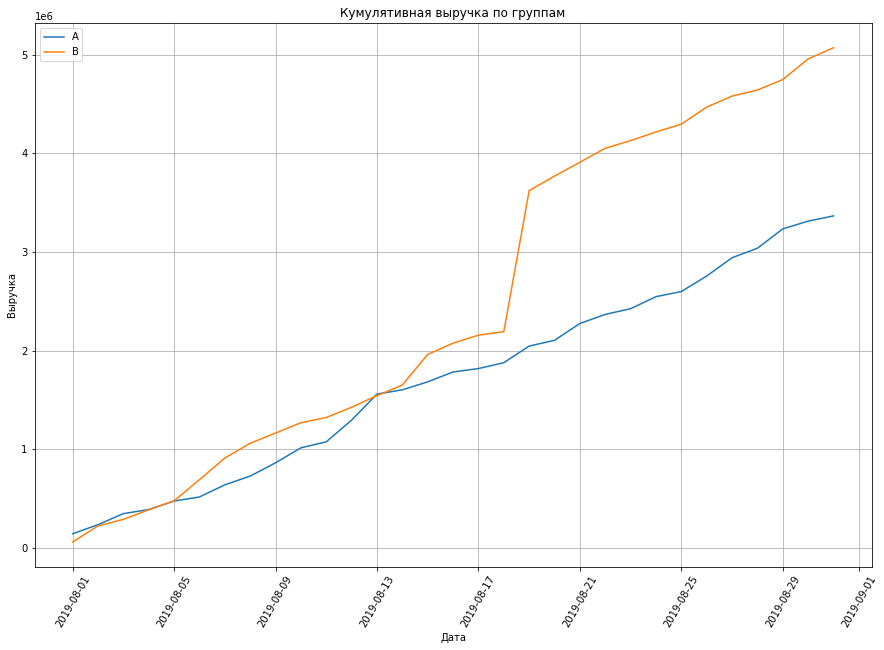

In [21]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Зададим размер графиков
plt.rcParams ['figure.figsize'] = [15, 10]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title("Кумулятивная выручка по группам")
plt.xticks(rotation=60)
plt.grid()
plt.legend();

**Вывод:** По графику видно, что в обоих группах на протяжении всего теста выручка стабильно растёт, после 17 августа выручка в группе `В` резко подскочила, но затем стабилизировалась, это может быть связанно с очень дорогими заказами или с их большим числом. Пока нет оснований утверждать, что группа `B` лучше, необходимо проверить данные на выбросы. 

**Постройте график кумулятивного среднего чека по группам**

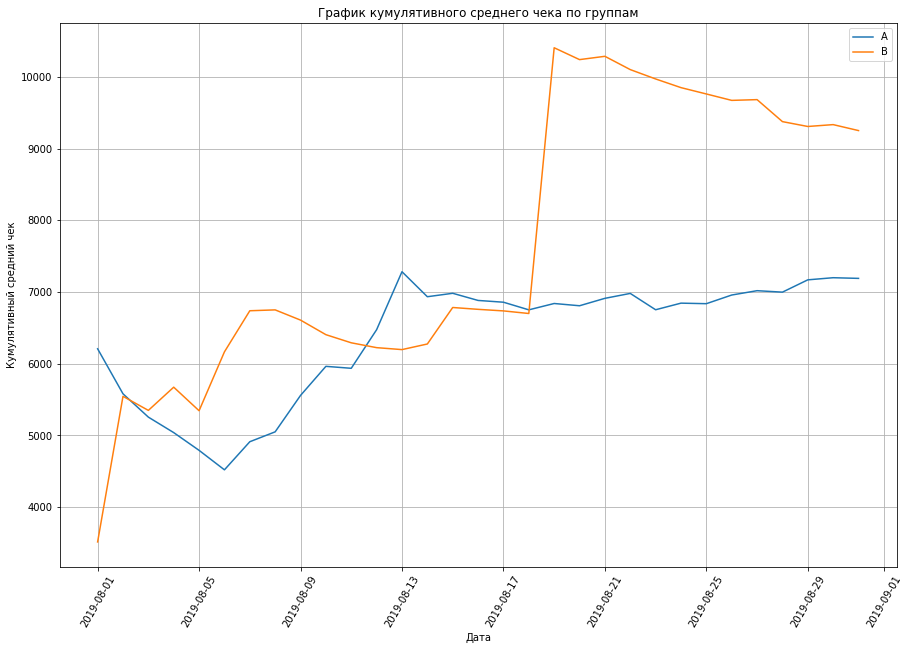

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')
plt.grid()
plt.xticks(rotation=60)
plt.legend();

**Вывод:** График группы `A` более плавный, по графику группы `B` наблюдается такой же скачок как и с кумулятивной выручкой, к концу так же стабилизируется, возможные причины аналогичны.

**Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

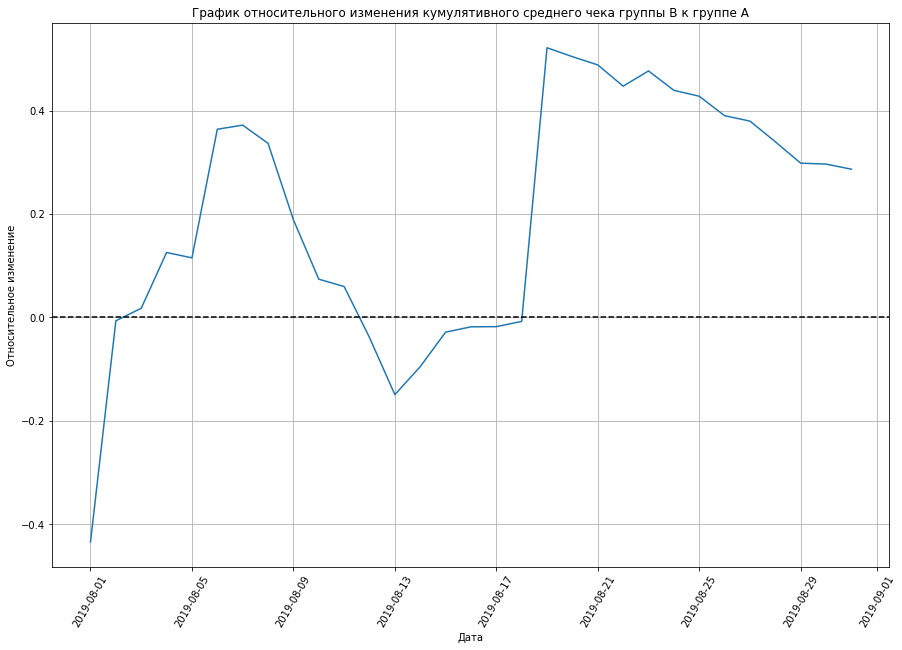

In [23]:
# Собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Строим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.grid()
plt.xticks(rotation=60);

**Вывод:** На графике видно, что большую часть времени показатели группы `B` лучше, чем у `A`, 13 августа заметна просадка, но дальше следует резкий скачок, вероятно вызванный крупными заказами, после чего график начинает стабилизироваться. 

**Построим график кумулятивного среднего количества заказов на посетителя по группам**

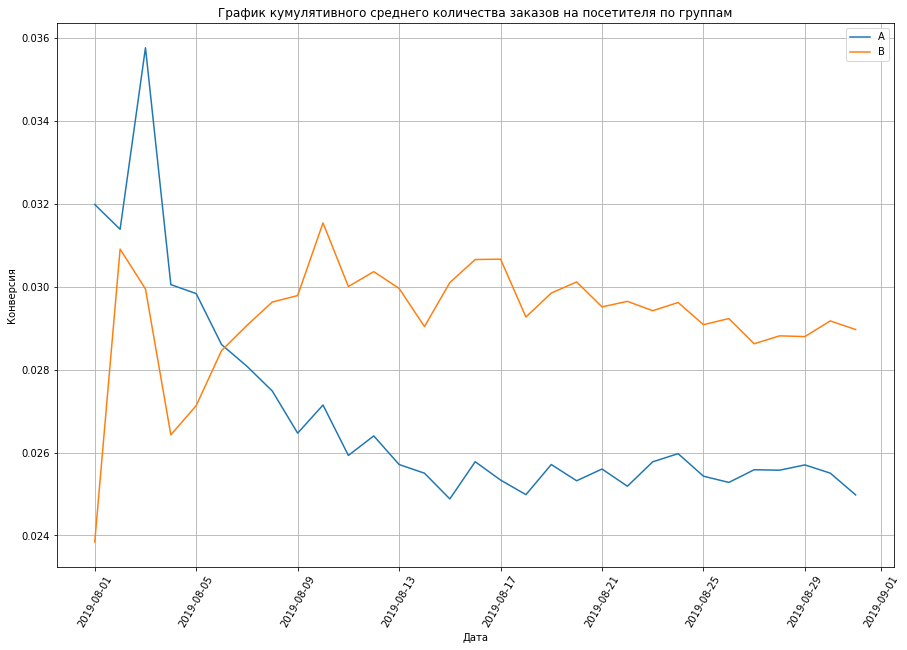

In [24]:
# считаем кумулятивную конверсию(среднее количество заказов на посетителя)
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.xticks(rotation=60)
plt.legend();


**Вывод:** В начале теста конверсия группы `A` была выше, но позже упала и зафиксировалась в районе 0,30, а конверсия группы `B` наоборот выросла и зафиксировалась в районе 0,34.

**Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

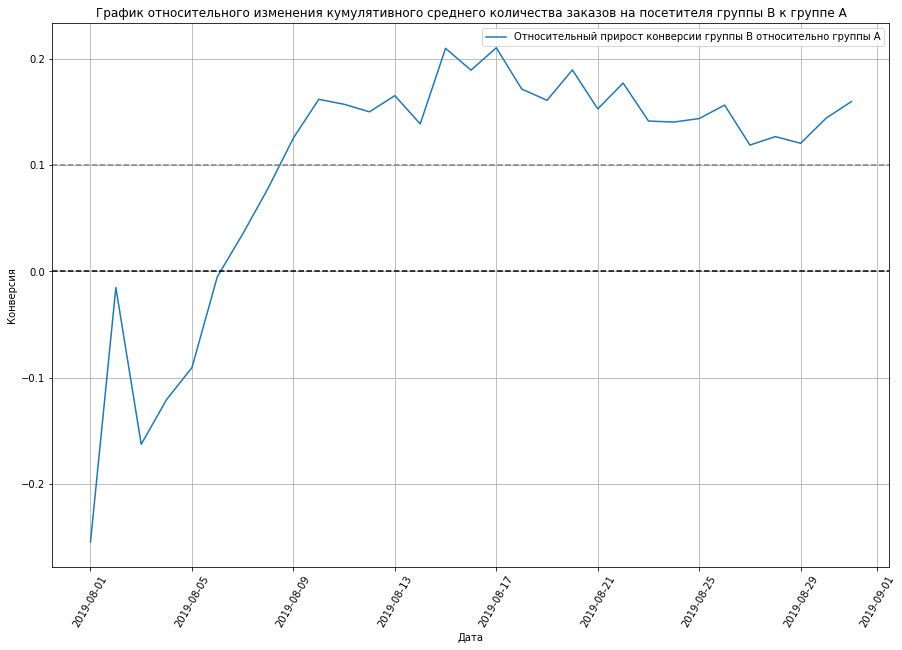

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.xticks(rotation=60);

**Вывод:** По началу группа `B` уступала группе `A`, но после 5 августа вырывается вперёд, достигая пика в 21% 15 августа, далее  снижается. В последние дни теста наблюдается небольшой рост, видно, что конверсия пока ещё не установилась.

**Построим точечный график количества заказов по пользователям**

In [26]:
# Сгруппируем пользователей по количеству заказов
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


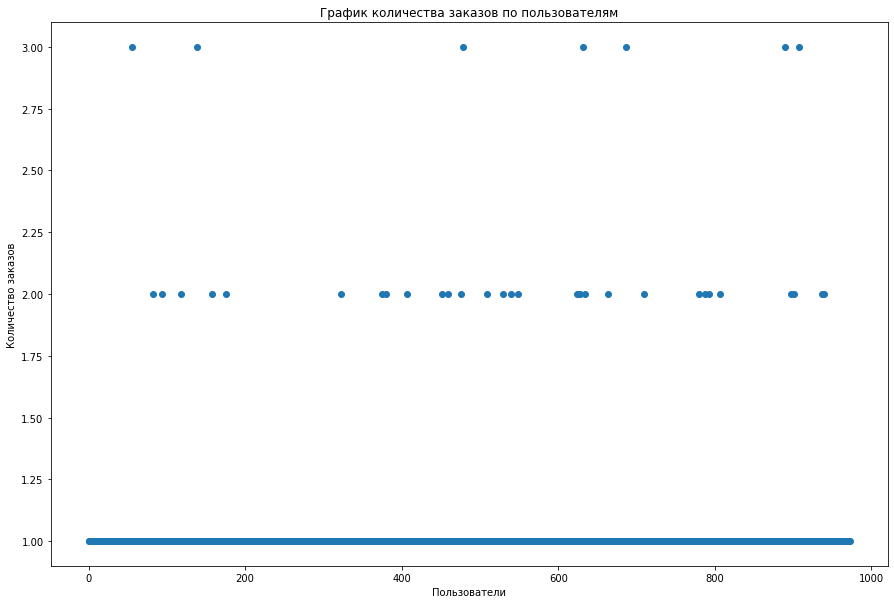

In [27]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("График количества заказов по пользователям");

**Вывод:** По графику видно, что чаще всего пользователи делали только один заказ, заметная часть пользователей совершала до 5 заказов, совсем редки пользователи с более, чем 10 заказами. Необходимо посчитать перцентили, чтобы понять, кого считать аномальными.

In [28]:
# Посчитаем 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Можно сказать, что больше одного заказа совершили 5% пользователей, а больше 2 лишь 1%. Отсеем пользователей, совершивших более 2 заказов.

**Построим точечный график стоимостей заказов**

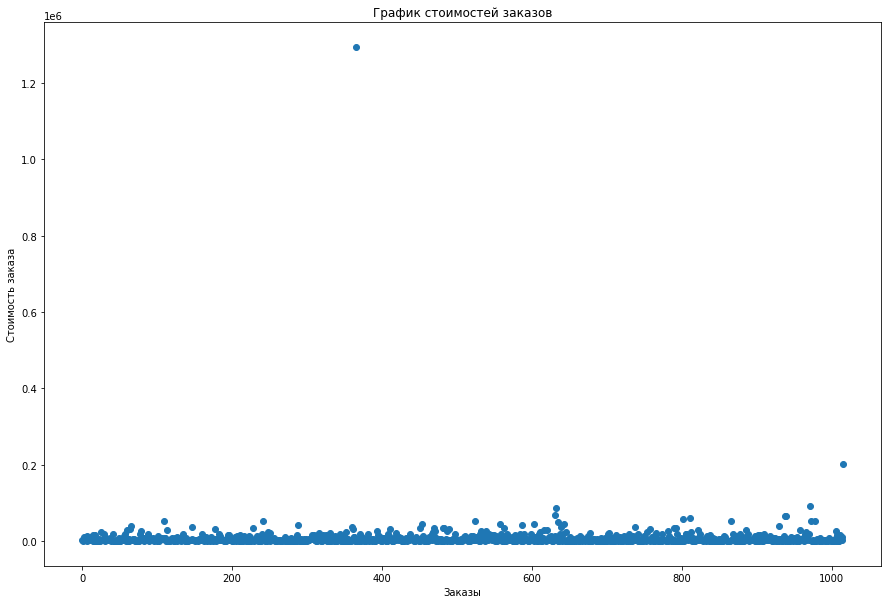

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.title("График стоимостей заказов");

**Вывод:** Самый дорогой заказ стоил больше 1,2 млн., а второй выброс около 200 тыс. Основная масса заказов дешевле 100 тыс.

In [30]:
# Посчитаем 95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Дороже 26,7 тыс. вышло 5% заказов, а дороже 53,9 тыс. 1%. Отсеем заказы дороже 27 тыс.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

In [31]:
# Соберём кумулятивные данные данные за каждый день в одном датафрейме с разбивкой по группам
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,19,142779,17,59758,19,142779,17,59758,719,713,719,713
1,2019-08-02,18,91602,23,162043,37,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,61,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,72,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,94,474413,89,475648,756,707,3318,3280


Сформулируем гипотезы
- $H_0:$ различий в среднем количестве заказов между группами нет 
- $H_1:$ различия в среднем количестве заказов между группами есть

Уровень статистической значимости возьму 5%.

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = 0.05
results_1 = stats.mannwhitneyu(sampleA, sampleB)
print('P-value:',"{0:.3f}".format(results_1.pvalue))

if (results_1.pvalue < alpha):
    print('Отвергаю нулевую гипотезу, в среднем количистве заказов различия между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, в среднем количистве заказов различий между группами нет')


print('Относительные различия в среднем количистве заказов:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Отвергаю нулевую гипотезу, в среднем количистве заказов различия между группами есть
Относительные различия в среднем количистве заказов: 0.160


`P-value` меньше уровня статистической значимости, из этого следует, что по "сырым данным" в среднем количистве заказов различия между группами есть. Относительный прирост группы В равен 16%.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

Сформулируем гипотезы
- $H_0:$ различий в среднем чеке заказа между группами нет 
- $H_1:$ различия в среднем чеке заказа между группами есть

Уровень статистической значимости возьму 5%.

In [33]:
results_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value:',"{0:.3f}".format(results_2.pvalue))

if (results_2.pvalue < alpha):
    print('Отвергаю нулевую гипотезу, в среднем чеке заказа различия между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, в среднем чеке заказа различий между группами нет')

print('Относительные различия в среднем чеке:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Не получилось отвергнуть нулевую гипотезу, в среднем чеке заказа различий между группами нет
Относительные различия в среднем чеке: 0.287


`P-value` сильно выше уровня статистической значимости, из этого следует, что по "сырым данным" в среднем чеке заказа различий между группами нет. Относительный прирост группы В равен 16%. Относительные различия в среднем чеке равны 28,7%.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

In [34]:
# Узнаем, сколько всего аномальных пользователей 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(100*'-')
print(abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
----------------------------------------------------------------------------------------------------
58


Сформулируем гипотезы
- $H_0:$ различий в среднем количестве заказов между группами нет 
- $H_1:$ различия в среднем количестве заказов между группами есть

Уровень статистической значимости возьму 5%.

In [35]:
# Создадим отфильтрованные датафреймы
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

results_3 = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value:',"{0:.3f}".format(results_3.pvalue))

if (results_3.pvalue < alpha):
    print('Отвергаю нулевую гипотезу, в среднем количестве заказов различия между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, в среднем количестве заказов различий между группами нет')

print('Относительные различия в среднем количистве заказов:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.012
Отвергаю нулевую гипотезу, в среднем количестве заказов различия между группами есть
Относительные различия в среднем количистве заказов: 0.182


`P-value` меньше уровня статистической значимости, из этого следует, что по "очищенным данным" в среднем количистве заказов различия между группами есть. Относительный прирост группы В равен 18,2%. Результат после очистки от выбросов поменялся слабо.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

Сформулируем гипотезы
- $H_0:$ различий в среднем чеке заказа между группами нет 
- $H_1:$ различия в среднем чеке заказа между группами есть

Уровень статистической значимости возьму 5%.

In [36]:
results_4 = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'])
print('P-value:',"{0:.3f}".format(results_4.pvalue))

if (results_4.pvalue < alpha):
    print('Отвергаю нулевую гипотезу, в среднем чеке различия между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, в среднем чеке различий между группами нет')
    
print(
    'Относительные различия в среднем чеке:',"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


P-value: 0.646
Не получилось отвергнуть нулевую гипотезу, в среднем чеке различий между группами нет
Относительные различия в среднем чеке: -0.048


`P-value` сильно выше уровня статистической значимости, из этого следует, что по "очищенным данным" в среднем чеке различий между группами нет. Относительные различия уменьшились до 4,8% с 28,7%. Получается, что виной высокому проценту относительных различий были выбросы.

**Выводы:** По итогу исследования можно отметить следующее:
- Есть статистически значимые различия по среднему количеству заказов между группами по «сырым» и по отфильтрованным данным;
- Статистически значимого различия по среднему чеку нет ни по "сырым", ни по фильтрованным данным;
- По графику различия среднего количества заказов между группами видно, что результаты группы `B` лучше примерно на 15%, также заметна тенденция к улучшению;
- На графике различия среднего чека видны сильные колебания, к концу теста он стабилизируется, а результаты группы `B` превоосходят результаты группы `A`, но по анализу отфильтрованных данных становится ясно, что статистически значимого различия нет.

Есть основания признать тест успешным и остановить его, тест показал рост числа заказов на клиента(конверсию) в группе `B`, по среднму чеку победителей нет. Также нет оснований ожидать, что при продолжении теста его результаты изменяться.